Now processing (ball, flower)
Final score: 0.15740902721881866
Target word (ball) has a difficulty rating!

Now processing (bridge, table)
Final score: 0.09458004683256149
Target word (bridge) has a difficulty rating!

Now processing (kittens, cat)
Found a match in MEN database for (kittens, cat)!
Distance from word2vec and MEN: 0.3412886667251587
Final score: 0.8093556666374206
Target word (kittens) has a difficulty rating!

Now processing (kittens, glass)
Final score: 0.11298742145299911
Target word (kittens) has a difficulty rating!

Now processing (banana, apple)
Final score: 0.5318406224250793
Target word (banana) has a difficulty rating!

Now processing (ball, apple)
Final score: 0.1296665519475937
Target word (ball) has a difficulty rating!

Now processing (cat, glass)
Final score: 0.12175223231315613
Target word (cat) has a difficulty rating!

The Spearman correlation for this dataset is: -0.12848904218751164


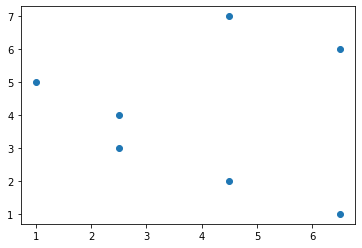

In [1]:
import gensim.downloader as api
import math
import matplotlib.pyplot as plt

NOW_PROCESSING = "Now processing ({0}, {1})"
FOUND_MATCH = "Found a match in MEN database for ({0}, {1})!"
MEN_DISTANCE = "Distance from word2vec and MEN: {0}"
DONE = "Final score: {0}"

FOUND_CORRELATION = "Target word ({0}) has a difficulty rating!"
CORRELATION = "The Spearman correlation for this dataset is: {0}"

def main():
    # Load our models
    wv = api.load("word2vec-google-news-300")
    men = tupleize("data/men.csv")

    # First, extract our target - response pairs
    input = tupleize("input.csv")

    # Of course we are also going to need some "difficulty" metric
    difficulty = dict(tupleize("data/difficulty.csv"))
    # This will contain tuples with the target word, its difficulty
    # and the final score (relative to the response word)
    correlation = []

    # Then, get similarity estimates from our models
    with open("output.csv", "w") as output:
        for target, response in input:
            print(NOW_PROCESSING.format(target, response));
            wvScore = wv.similarity(target, response)

            # If available, extract similarity estimate
            # from MAN as well...
            match = [score for score in men if (target in score
                                            and response in score)]

            if len(match) > 0:
                # If found normalize it...
                print(FOUND_MATCH.format(target, response))
                menScore = float(match[0][2]) / 50.0
                # ...find the vector distance from the two models...
                distance = abs(menScore - wvScore)
                print(MEN_DISTANCE.format(distance))
                # ...and get a final value as the mean of the two scores
                meanScore = mean([wvScore, menScore])
            else:
                # Too bad, can't do anything about it...
                meanScore = wvScore

            print(DONE.format(meanScore));
            # Write our results in output.csv
            output.write(", ".join([target, response, str(meanScore)]))
            output.write("\n")

            # Now working on our correlation coefficient
            #
            # First, we need to keep track of which target words
            # have a difficulty score associated to them. We'll only
            # be able to use those to calculate our correlation coefficient.

            if target in difficulty:
                print(FOUND_CORRELATION.format(target), end="\n\n")
                # Keep track of the word, its difficulty score and the mean
                # similarity with the response word.
                # Of course there can be more than one entry for a
                # given target word.
                tuple = (target, float(difficulty[target]), meanScore)
                correlation.append(tuple)

    # Now that we know which target words can be used
    # for the evaluation of our correlation coefficient
    # we need to construct the variables' rankings.
    xrank = rank([i[1] for i in correlation], False)
    yrank = rank([i[2] for i in correlation], True)

    covariance = cov(list(zip(xrank, yrank)))

    spearman = covariance / math.sqrt(var(xrank) * var(yrank))
    print(CORRELATION.format(spearman))

    # Might be interesting...
    plt.scatter(xrank, yrank)
    plt.show()

# Quick&dirty implementation of the fractional sorting
# algo, Spearman works best with this...
def rank(data, sorting = False):
    ranking = []
    occurrences = {}

    for value in data:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    unique = list(occurrences.keys())
    unique.sort(reverse = sorting)

    for value in data:
        position = 1
        for rank in unique:
            if rank != value:
                position += occurrences[rank]
            else:
                break

        position += (occurrences[value] - 1) / 2
        ranking.append(position)

    return ranking

def cov(data):
    mux = mean([i[0] for i in data])
    muy = mean([i[1] for i in data])

    ret = sum([(i[0] - mux) * (i[1] - muy) for i in data]) / (len(data) - 1)
    return ret

def var(data):
    return cov([(i, i) for i in data])

def mean(data):
    return sum(data) / len(data)

def tupleize(file):
    output = []
    with open(file, "r") as input:
        line = input.readline()
        while line:
            nuple = tuple(line.rstrip().split(", "))
            output.append(nuple)
            line = input.readline();

    return output

if __name__ == "__main__":
    main()
else:
    print("Please run as main.")


# FIN QUA FUNZIONA, non toccare sopra!!!

In [5]:
import gensim.downloader as api
import math
import matplotlib.pyplot as plt

NOW_PROCESSING = "Now processing ({0}, {1})"
FOUND_MATCH = "Found a match in MEN database for ({0}, {1})!"
MEN_DISTANCE = "Distance from word2vec and MEN: {0}"
DONE = "Final score: {0}"

FOUND_CORRELATION = "Target word ({0}) has a difficulty rating!"
CORRELATION = "The Spearman correlation for this dataset is: {0}"

def main():
    # Load our models
    wv = api.load("word2vec-google-news-300")
    men = tupleize("data/men.csv")
    
# tupleize = funzione definita sotto per trasformare in tuple i miei dati

    # First, extract our target - response pairs
    input = tupleize("input_pairs_EN.csv")

    # Of course we are also going to need some "difficulty" metric
    difficulty = dict(tupleize("data/difficulty.csv"))
    
    
    # This will contain tuples with the target word, its difficulty
    # and the final score (relative to the response word)
    correlation = []

    # Then, get similarity estimates from our models
    with open("output.csv", "w") as output:
        for target, response in input:
            print(NOW_PROCESSING.format(target, response));
            wvScore = wv.similarity(target, response)

            # If available, extract similarity estimate
            # from MAN as well...
            match = [score for score in men if (target in score
                                            and response in score)]

            if len(match) > 0:
                # If found normalize it...
                print(FOUND_MATCH.format(target, response))
                menScore = float(match[0][2]) / 50.0
                # ...find the vector distance from the two models...
                distance = abs(menScore - wvScore)
                print(MEN_DISTANCE.format(distance))
                # ...and get a final value as the mean of the two scores
                meanScore = mean([wvScore, menScore])
            else:
                # Too bad, can't do anything about it...
                meanScore = wvScore

            print(DONE.format(meanScore));
            # Write our results in output.csv
            output.write(", ".join([target, response, str(meanScore)]))
            output.write("\n")

            # Now working on our correlation coefficient
            #
            # First, we need to keep track of which target words
            # have a difficulty score associated to them. We'll only
            # be able to use those to calculate our correlation coefficient.

            if target in difficulty:
                print(FOUND_CORRELATION.format(target), end="\n\n")
                # Keep track of the word, its difficulty score and the mean
                # similarity with the response word.
                # Of course there can be more than one entry for a
                # given target word.
                tuple = (target, float(difficulty[target]), meanScore)
                correlation.append(tuple)

    # Now that we know which target words can be used
    # for the evaluation of our correlation coefficient
    # we need to construct the variables' rankings.
    xrank = rank([i[1] for i in correlation], False)
    yrank = rank([i[2] for i in correlation], True)

    covariance = cov(list(zip(xrank, yrank)))

    spearman = covariance / math.sqrt(var(xrank) * var(yrank))
    print(CORRELATION.format(spearman))

    # Might be interesting...
    plt.scatter(xrank, yrank)
    plt.show()

# Quick&dirty implementation of the fractional sorting
# algo, Spearman works best with this...
def rank(data, sorting = False):
    ranking = []
    occurrences = {}

    for value in data:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    unique = list(occurrences.keys())
    unique.sort(reverse = sorting)

    for value in data:
        position = 1
        for rank in unique:
            if rank != value:
                position += occurrences[rank]
            else:
                break

        position += (occurrences[value] - 1) / 2
        ranking.append(position)

    return ranking

def cov(data):
    mux = mean([i[0] for i in data])
    muy = mean([i[1] for i in data])

    ret = sum([(i[0] - mux) * (i[1] - muy) for i in data]) / (len(data) - 1)
    return ret

def var(data):
    return cov([(i, i) for i in data])

def mean(data):
    return sum(data) / len(data)

def tupleize(file):
    output = []
    with open(file, "r") as input:
        line = input.readline()
        while line:
            nuple = tuple(line.rstrip().split(", "))
            output.append(nuple)
            line = input.readline();

    return output

if __name__ == "__main__":
    main()
else:
    print("Please run as main.")


ValueError: too many values to unpack (expected 2)